In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.optimize as fit

In [35]:
df_nba = pd.read_csv('nba_2022-23_all_stats_with_salary.csv') # this is basically just for getting out the data
df_nba = df_nba[df_nba['GP'] > 20]# this is how we would filter the data, # how it would look if the games played minumum was 42
#also the indexing is wrong on the left,just look at how many rows there are

df_nba = df_nba[df_nba['MP'] > 15.0] # this is minutes playing time, has to be a float value im pretty sure

df_nba


,Unnamed: 0,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9
5,5,Bradley Beal,43279250,SG,29,WAS,50,50,33.5,8.9,...,12.9,29.2,2.2,1.2,3.4,0.099,2.9,-1.2,1.8,1.6
6,6,Kawhi Leonard,42492492,SF,31,LAC,52,50,33.6,8.6,...,8.1,27.0,4.9,2.2,7.1,0.194,5.1,0.9,6.1,3.5
7,7,Paul George,42492492,SF,32,LAC,56,56,34.6,8.2,...,13.4,29.5,2.3,2.3,4.6,0.114,2.4,0.3,2.8,2.3
8,8,Giannis Antetokounmpo,42492492,PF,28,MIL,63,63,32.1,11.2,...,13.2,38.8,4.9,3.7,8.6,0.204,5.8,2.7,8.5,5.4
9,9,Damian Lillard,42492492,PG,32,POR,58,58,36.3,9.6,...,11.7,33.8,8.2,0.8,9.0,0.205,8.3,-1.2,7.1,4.9


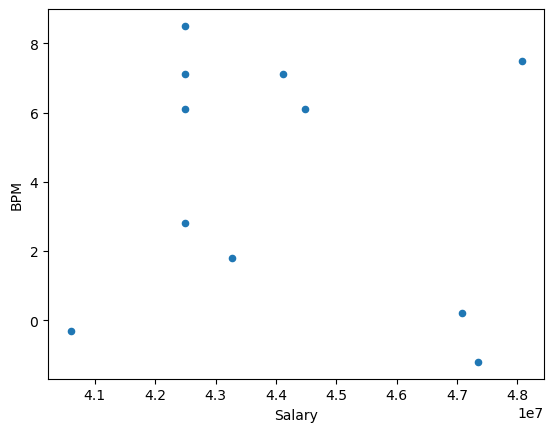

In [36]:
df_nba.plot(kind = 'scatter', x = 'Salary', y = 'BPM')
plt.show()

In [32]:
#this is based off BPM

def f(x, m, b): # model equation, x MUST come first in the list of arguments
    return m * x + b #linear line which makes predictinps

p0 = [(34.7/48070014), -2.5] # initial guess at parameters 

parameters, covariance_matrix = fit.curve_fit(f, df_nba['Salary'], df_nba['BPM'], p0) 


In [37]:
m = parameters[0]
b = parameters[1] 
m_error = (covariance_matrix[0,0]) ** 0.5
b_error = (covariance_matrix[1,1]) ** 0.5

print('the parameters are: ',parameters)
print('m = {0:1.5f} +\- {1:1.5f}'.format(m, m_error))
print('b = {0:1.5f} +\- {1:1.5f}'.format(b, b_error))
print('final equation: y = {0:1.3f}x + {1:1.3f}'.format(m, b))

the parameters are:  [ 1.37525127e-07 -1.89580912e+00]
m = 0.00000 +\- 0.00000
b = -1.89581 +\- 0.19689
final equation: y = 0.000x + -1.896
